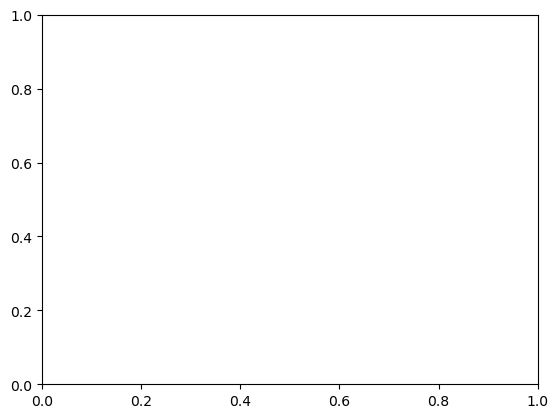

c:\Users\jaime\anaconda3\envs\LifeGPT_env\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [ ]:
#!/usr/bin/env python
# coding: utf-8

import os
import sys
import time
import pandas as pd
from datetime import datetime
module_path = os.path.abspath(os.path.join('..'))  # Go up one directory
if module_path not in sys.path:
    sys.path.append(module_path)

from conway_lib import ConwayGame

def pad_flat_string(state_str, max_length=256, pad_char='p'):
    """
    Pad an *already* flattened string of '0'/'1' characters 
    to length max_length with pad_char. If state_str is 
    shorter than max_length, we add trailing pad_char's.
    Otherwise, return it as-is.
    """
    needed = max_length - len(state_str)
    if needed > 0:
        return state_str + (pad_char * needed)
    return state_str

def generate_sets_multigrid_debug(
    A=5,                # samples per grid size
    I=2,                # how many states per sample
    grid_sizes=(16,8,4),
    toroidal=True,
    save_folder='.',
    filename_prefix='conway_multi_grid'
):
    os.makedirs(save_folder, exist_ok=True)
    start_time = time.time()
    max_grid_dim = max(grid_sizes)  
    max_length = max_grid_dim * max_grid_dim  # e.g. 16*16 = 256
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

    all_samples = []
    for gsize in grid_sizes:
        print(f"\n--- Now generating data for grid size {gsize}x{gsize} ---")
        game = ConwayGame(width=gsize, height=gsize, toroidal=toroidal, grid_size=1)

        # This returns an array of shape [A, I], 
        # each element is already a '0/1' string
        train_data = game.generate_sets(A=A, N=gsize, I=I, s=0, e=1)
        print("Raw train_data from generate_sets:\n", train_data)

        # Loop over each sample
        for sample_idx in range(A):
            padded_states = []
            # Loop over each iteration/state
            for iteration_idx in range(I):
                # This is already a flattened string of 0/1
                state_str = train_data[sample_idx][iteration_idx]
                # Just pad to max_length (256 for 16x16)
                padded_str = pad_flat_string(
                    state_str, 
                    max_length=max_length, 
                    pad_char='p'
                )

                padded_states.append(padded_str)

            # Build a dict for storing in DataFrame
            sample_dict = {f'State {i+1}': padded_states[i] for i in range(I)}
            sample_dict['GridSize'] = gsize
            all_samples.append(sample_dict)

    # Build the final DataFrame
    columns = ['GridSize'] + [f'State {i + 1}' for i in range(I)]
    df = pd.DataFrame(all_samples, columns=columns)

    # Save to CSV
    filename  = f"{filename_prefix}_{timestamp}.csv"
    save_path = os.path.join(save_folder, filename)
    df.to_csv(save_path, index=False)

    elapsed = time.time() - start_time
    print(f"\nSaved CSV to {save_path}")
    print(f"Elapsed time: {elapsed:.2f} s")

# Training data generation
if __name__ == "__main__":
    generate_sets_multigrid_debug(
        A=2500,       # 5 samples per grid size
        I=2,       # 2 states per sample
        grid_sizes=(16,8,4,2),
        toroidal=True,
        save_folder='datasets',
        filename_prefix='conway_multi_grid_train'
    )


Validation Set

In [6]:
generate_sets_multigrid_debug(
        A=250,       # 250 samples per grid size
        I=2,       # 2 states per sample
        grid_sizes=(16,8,4,2),
        toroidal=True,
        save_folder='datasets',
        filename_prefix='conway_multi_grid_val'
    )


--- Now generating data for grid size 16x16 ---
Raw train_data from generate_sets:
 [['0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'
  '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000']
 ['0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'
  '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [7]:
generate_sets_multigrid_debug(
        A=25,       # 250 samples per grid size
        I=2,       # 2 states per sample
        grid_sizes=(16,8,4,2),
        toroidal=True,
        save_folder='datasets',
        filename_prefix='conway_multi_grid_test'
    )


--- Now generating data for grid size 16x16 ---
Raw train_data from generate_sets:
 [['0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'
  '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000']
 ['0000000000000000000110000000000010000000000000000000000000001010000001000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000010000000100000000000000000000000000100000000000000010000'
  '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

Testing set with new grid sizes:

In [2]:
generate_sets_multigrid_debug(
        A=10,       # 10 samples per grid size
        I=2,       # 2 states (time iterations) per sample
        grid_sizes=(15,14,13,12,11,10,9,7,6,5,3),
        toroidal=True,
        save_folder='datasets',
        filename_prefix='conway_multi_grid__generalization_test'
    )


--- Now generating data for grid size 15x15 ---
Raw train_data from generate_sets:
 [['000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'
  '000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000']
 ['001000000000000001000101000000001000000000010000100000001001000000010000000000001000000000101000000000010000000000101000000100101000000000001001001001000000010000100000000000000001000000000000000000000110000000100000000000000'
  '01000000000000001110000000000000110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001111000000000010100000000000000000001000000000000000000000000000000000000000000000000000000000